# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


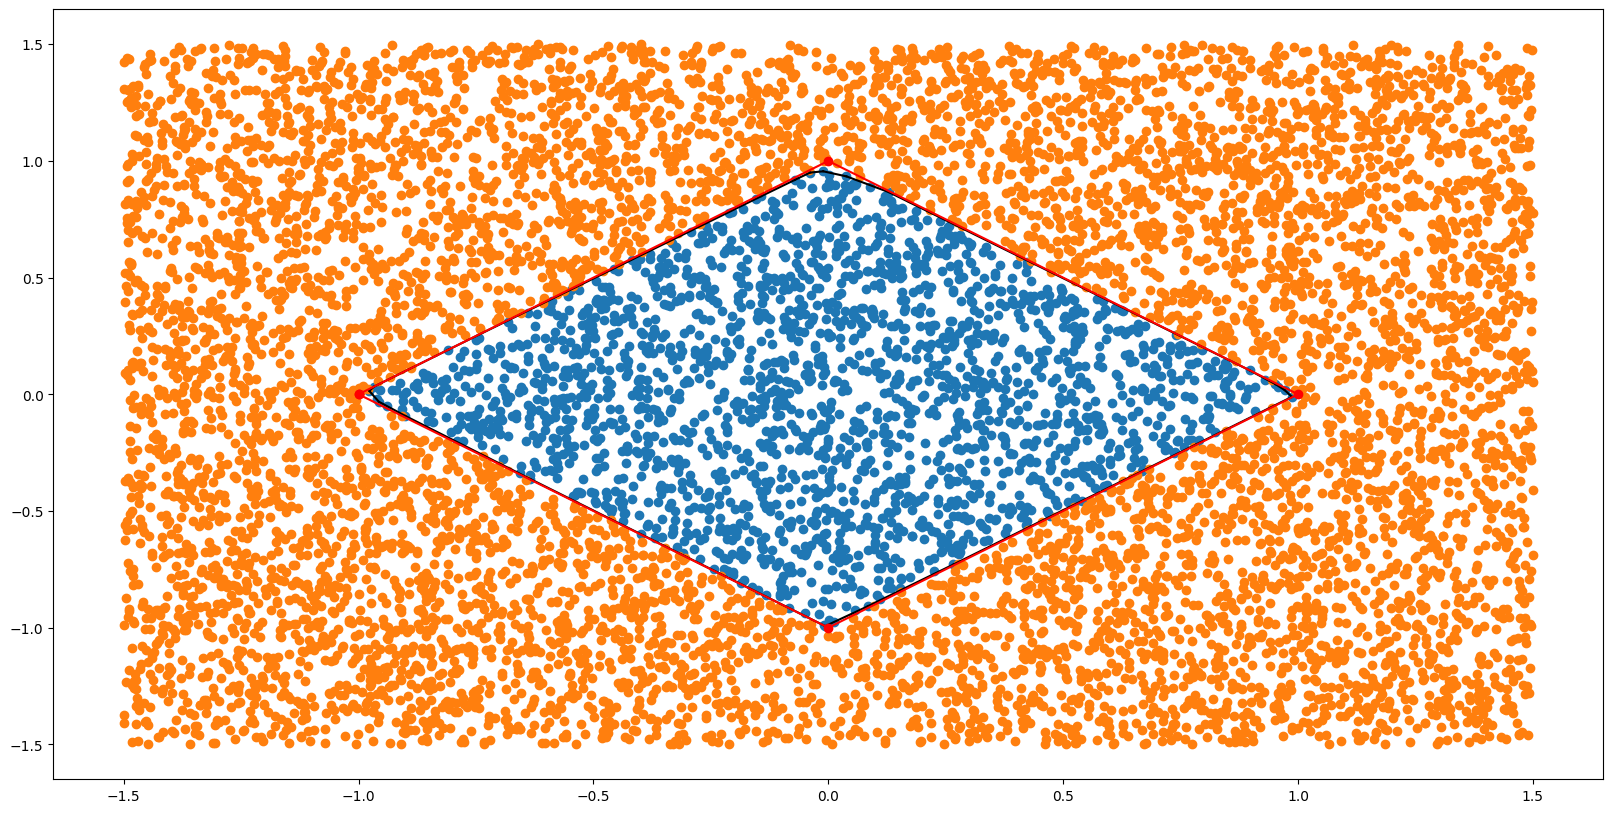

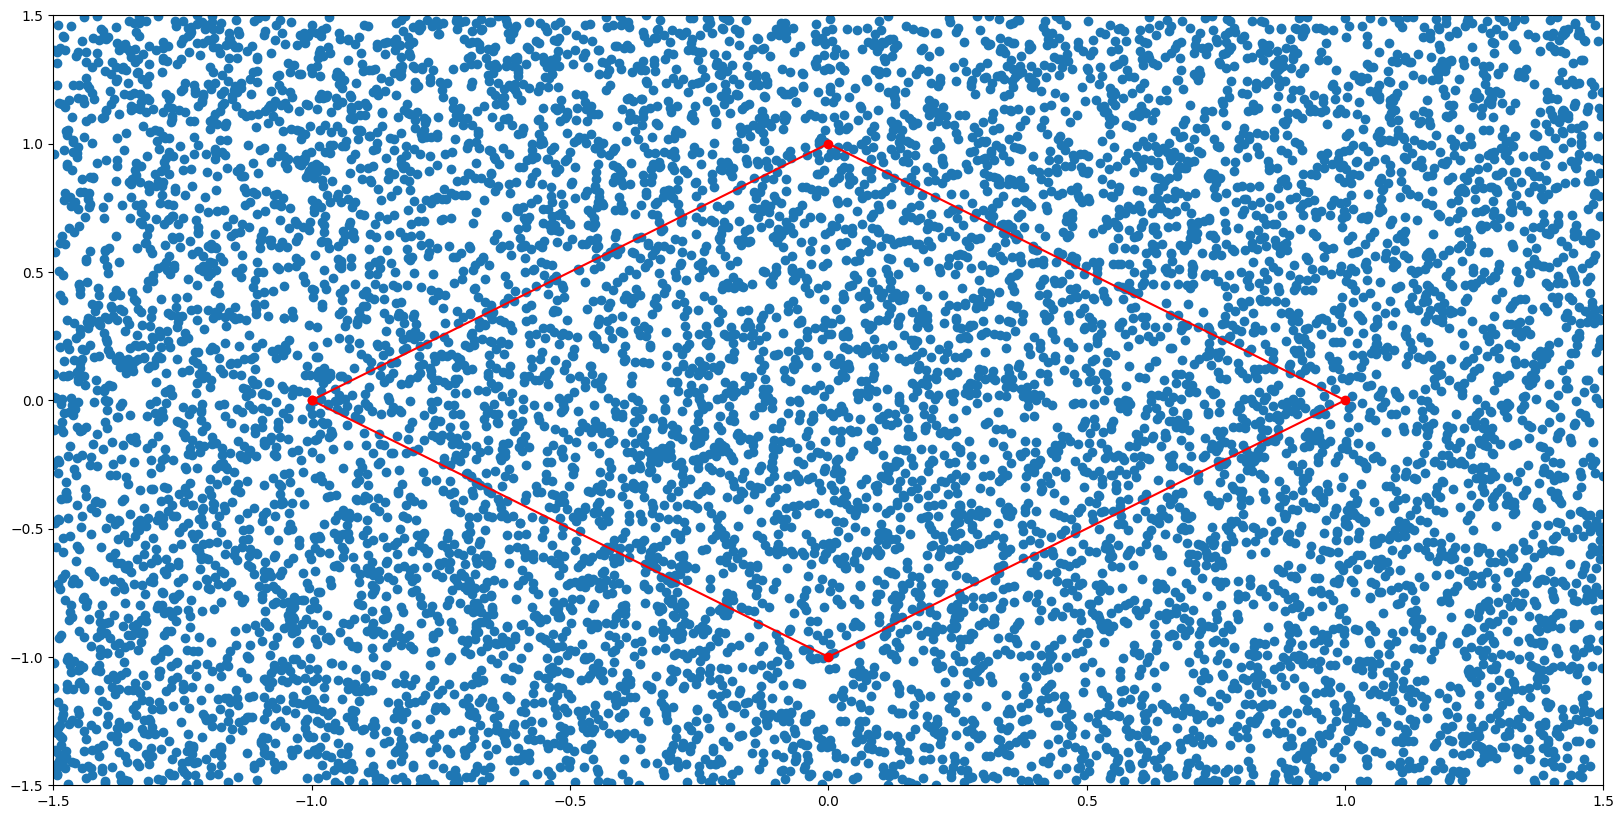

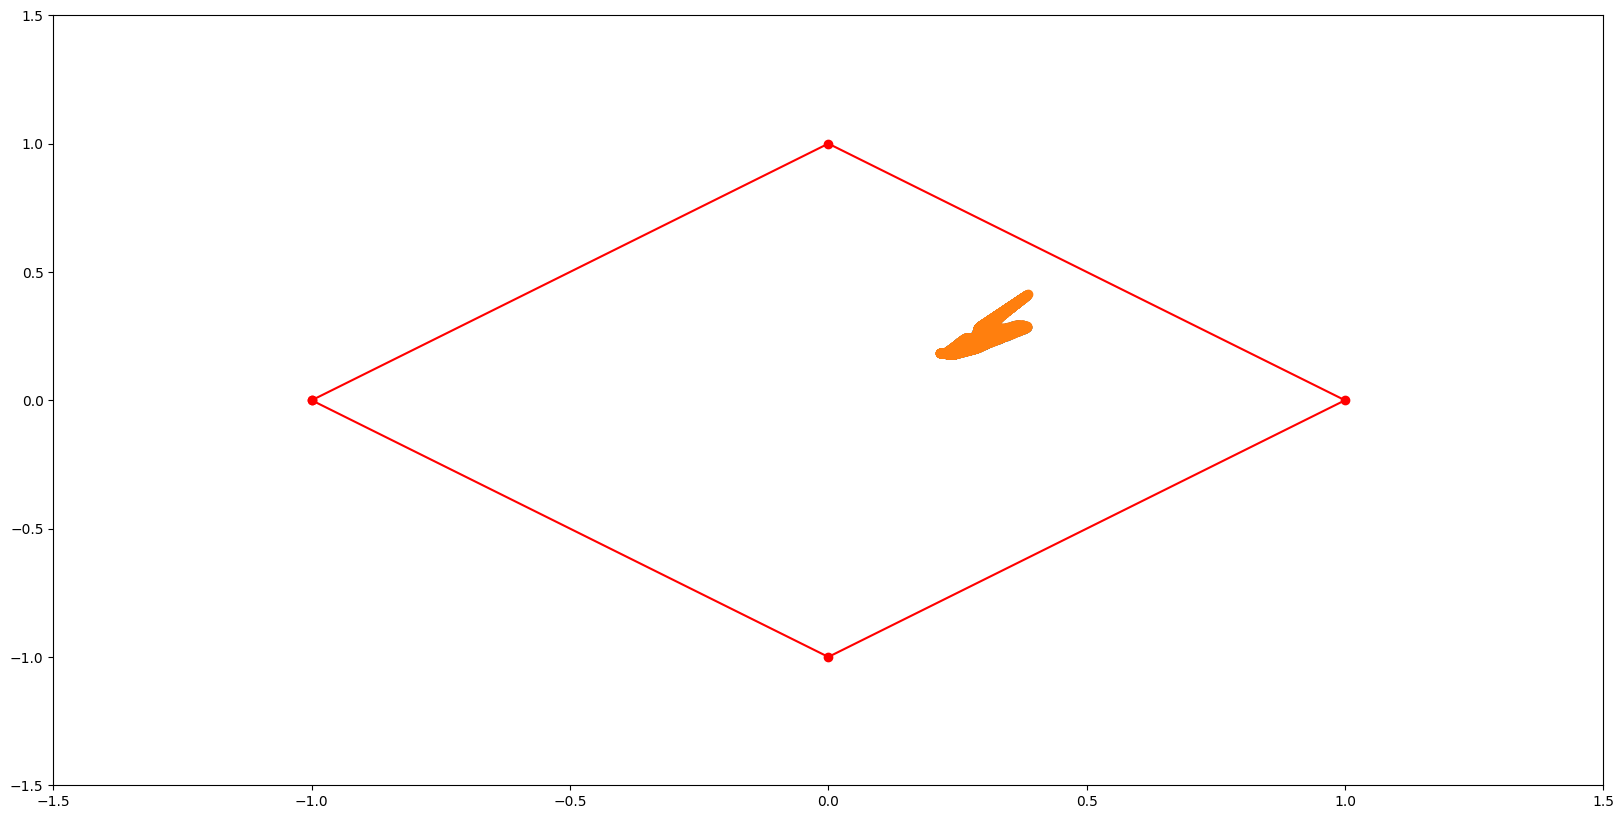

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [6]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.9274818657632584, l_pos = 0.6727646376010741, l_neg = 0.80971492083124, l_gen = 0.44500230733094437
batch = 100, mean loss = 1.9443189147590771, l_pos = 0.7748059361797847, l_neg = 0.644316611880234, l_gen = 0.5251963666990584
batch = 200, mean loss = 1.8946074191869025, l_pos = 0.7418401877837556, l_neg = 0.6054711256454751, l_gen = 0.5472961057576702
batch = 216, mean loss = 1.8847717108884932, l_pos = 0.7369470371216311, l_neg = 0.5929916754956104, l_gen = 0.554832998271249
=== Epoch: 1===
batch = 0, mean loss = 1.716712274388035, l_pos = 0.6589928893401359, l_neg = 0.3452274430272634, l_gen = 0.7124919420206357
batch = 100, mean loss = 1.665713030420617, l_pos = 0.6409842958384377, l_neg = 0.2054317894615137, l_gen = 0.8192969451206655
batch = 200, mean loss = 1.6257758382783198, l_pos = 0.6116880711253606, l_neg = 0.14008975378964358, l_gen = 0.8739980133633158
batch = 216, mean loss = 1.6204982351339572, l_pos = 0.6072896640980748, l_neg =

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.1760834614811777, l_pos = 0.17602694611503802, l_neg = 0.009440627463344542, l_gen = 0.9906158879027952
batch = 100, mean loss = 1.163603319129739, l_pos = 0.16359655899875805, l_neg = 0.002634307140855924, l_gen = 0.9973724529901253
batch = 200, mean loss = 1.1562137109832935, l_pos = 0.156209881078954, l_neg = 0.00183025663108437, l_gen = 0.9981735732732547
batch = 216, mean loss = 1.1551567711071524, l_pos = 0.1551531725902808, l_neg = 0.0017576123972743325, l_gen = 0.9982459861195973
=== Epoch: 1===
batch = 0, mean loss = 1.1402577038287423, l_pos = 0.14025715990075013, l_neg = 0.000782718913805567, l_gen = 0.9992178250141865
batch = 100, mean loss = 1.1350791325967182, l_pos = 0.13507871580094508, l_neg = 0.0007065831822246076, l_gen = 0.9992938336135486
batch = 200, mean loss = 1.12952094688821, l_pos = 0.12952060269700727, l_neg = 0.0006371625688626541, l_gen = 0.9993631816223398
batch = 216, mean loss = 1.1287483538715568, l_pos = 0.1287

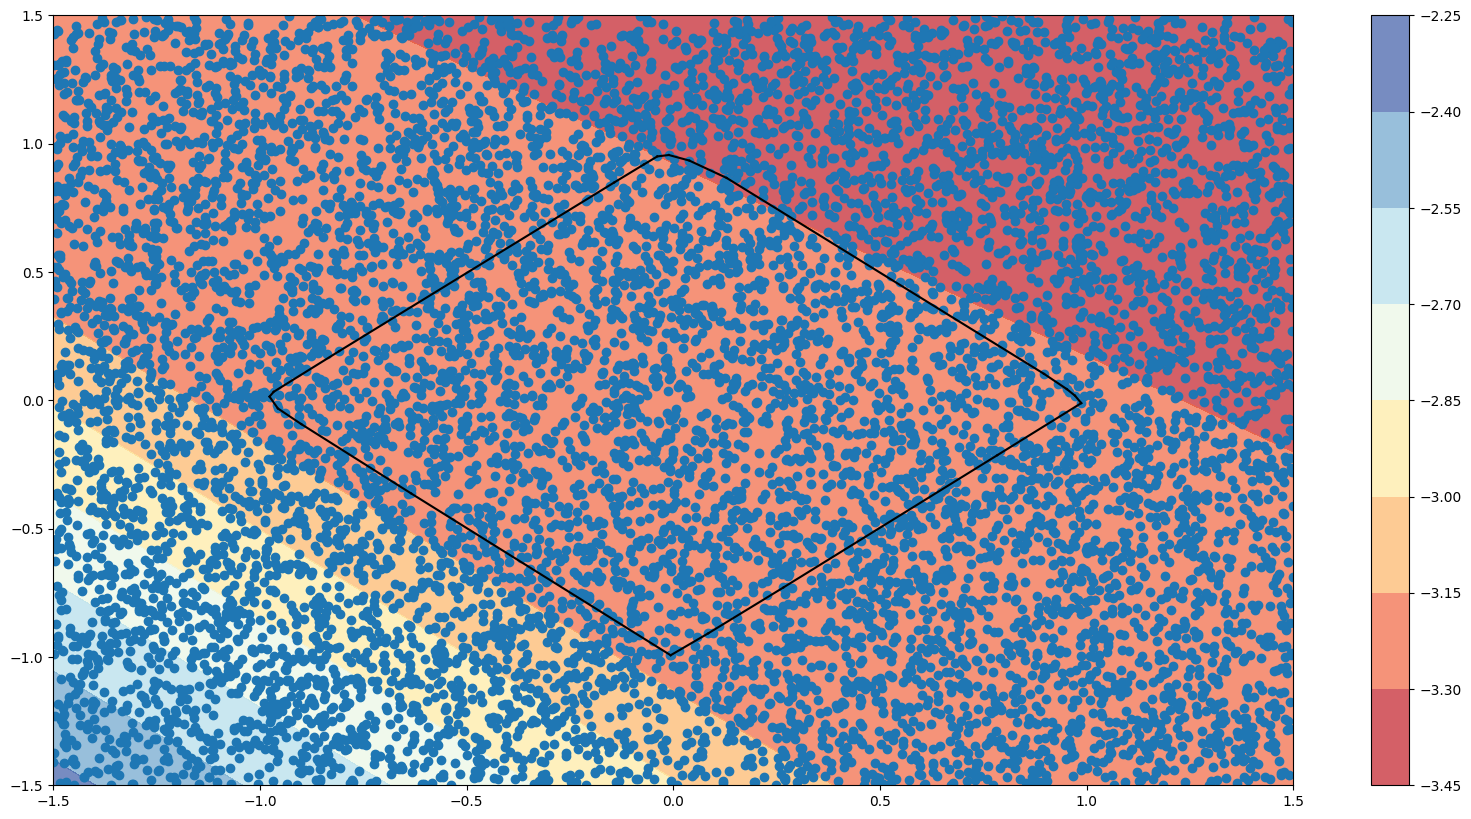

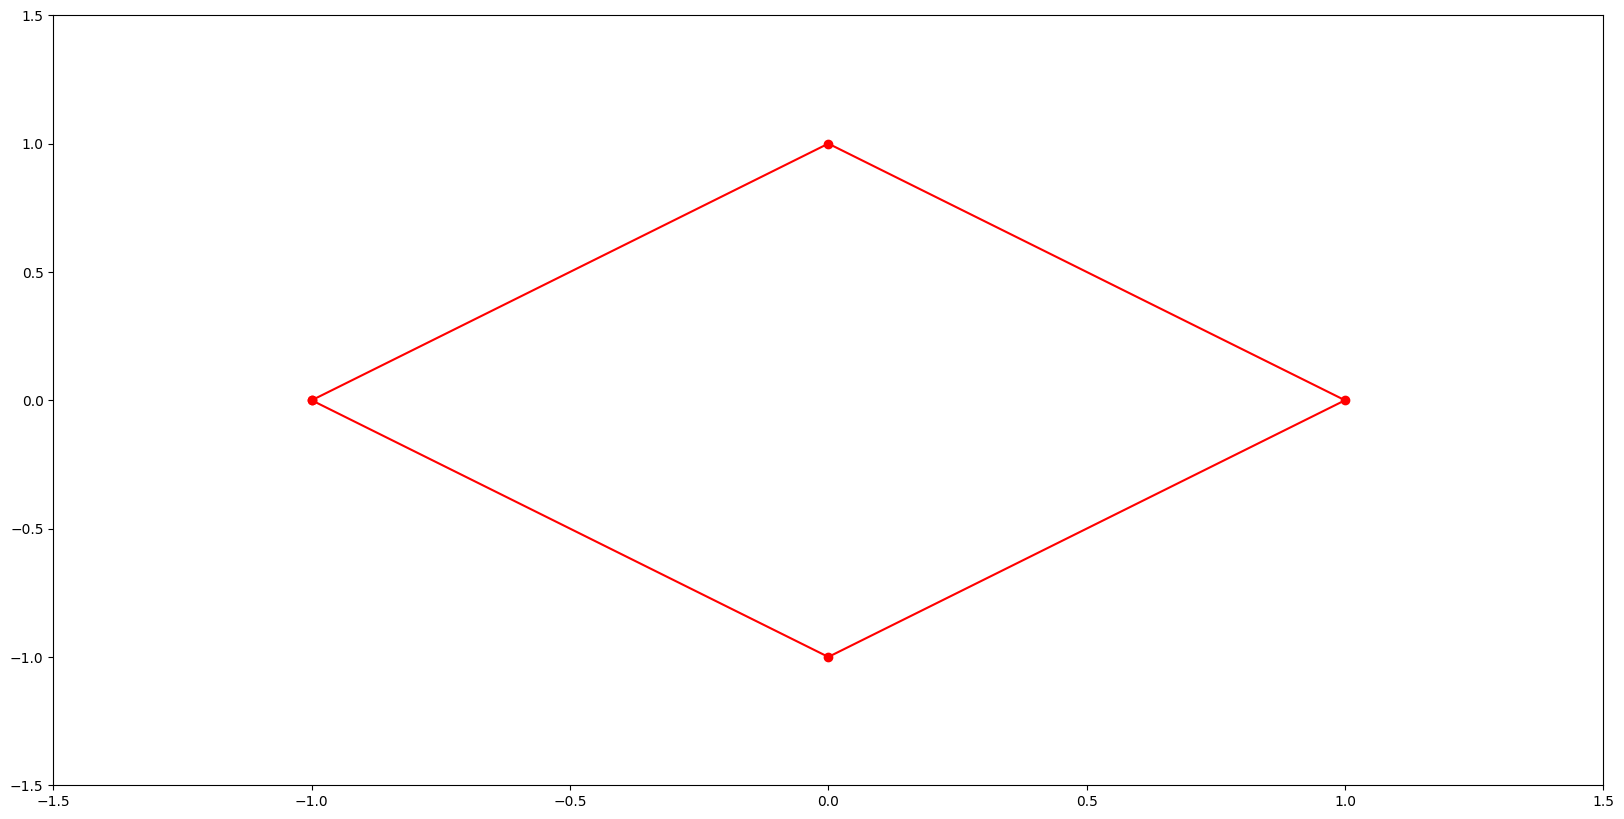

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [9]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A_b=[A,b], sequential=False)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
optimum solution at: [ 0. -1.], with value [-3.20142687], true output: 0


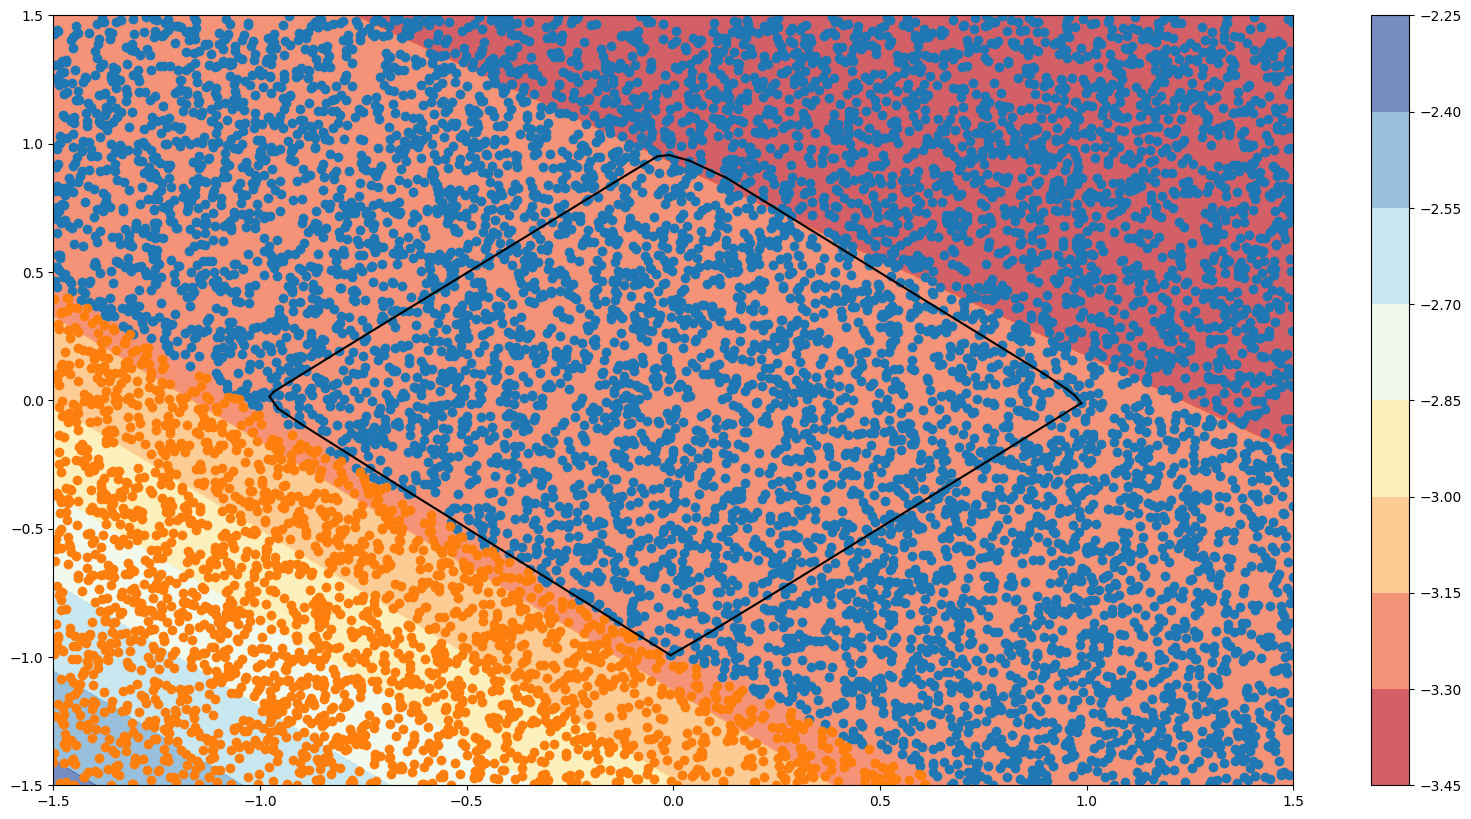

In [10]:
input_data, plots.c = result
plots.plt_mesh()